In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

Load the data from the csv file


In [3]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Preprocessing data and selection


In [ ]:
df = df[
    [
        "tenure",
        "age",
        "address",
        "income",
        "ed",
        "employ",
        "equip",
        "callcard",
        "wireless",
        "churn",
    ]
]
df["churn"] = df["churn"].astype("int")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
# How many rose and columns are in the df
print(df.shape)

(200, 10)


In [ ]:
X = np.asarray(df[["tenure", "age", "address", "income", "ed", "employ", "equip"]])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [ ]:
y = np.asarray(df["churn"])
y[0:5]

array([1, 1, 0, 0, 0])

normilizing the dataset


In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Train/Test dataset


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set (160, 7) (160,)
Test set:  (40, 7) (40,)


Modeling (Logistic Regression with Scikit-learn)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


In [13]:
yhat = LR.predict(X_test)
print(yhat)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]


In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161]])

Evaluation


jaccard index


In [16]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, pos_label=0)

np.float64(0.7058823529411765)

Confusion matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plt_cnm(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arrange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


print(confusion_matrix(y_test, yhat, labels=[1, 0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization


AttributeError: module 'numpy' has no attribute 'arrange'

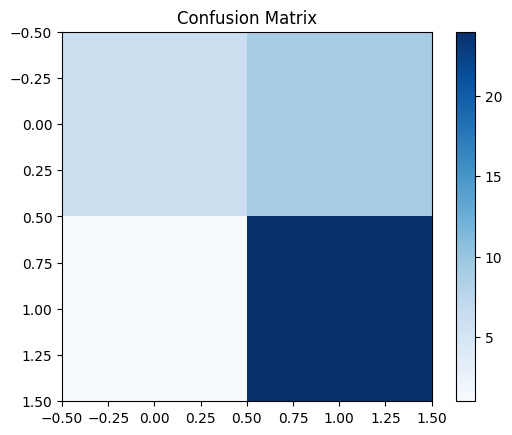

In [ ]:
# compute the cnm
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

# plot
plt.figure()
plt_cnm(
    cnf_matrix,
    classes=["churn=1", "churn=0"],
    normalize=False,
    title="Confusion Matrix",
)